In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam


In [6]:
x=np.arange(0,100,0.1)
y=0.5*np.sin(2*x)-np.cos(x/2.0)

seq_data=y.reshape(-1,1)

print(seq_data.shape)
print(seq_data[:5])

(1000, 1)
[[-1.        ]
 [-0.89941559]
 [-0.80029499]
 [-0.70644984]
 [-0.62138853]]


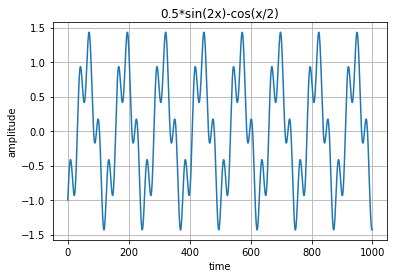

In [7]:
plt.grid()
plt.title('0.5*sin(2x)-cos(x/2)')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.plot(seq_data)
plt.show()

In [10]:
def seq2dataset(seq,window, horizon):
    X=[]
    Y=[]
    for i in range(len(seq)-(window+horizon)+1):
        x=seq[i:(i+window)]
        y=(seq[i+window+horizon-1])

        X.append(x)
        Y.append(y)
    return np.array(X), np.array(Y)

In [11]:
w=20
h=1
X,Y = seq2dataset(seq_data, w, h)
print(X.shape, Y.shape)

(980, 20, 1) (980, 1)


In [13]:
split_ratio=0.8
split=int(split_ratio*len(X))

x_train = X[0:split]
y_train = Y[0:split]

x_test = X[split:]
y_test = Y[split:]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(784, 20, 1) (784, 1) (196, 20, 1) (196, 1)


In [26]:
model= Sequential()
model.add(SimpleRNN(units=128, activation='tanh', input_shape=(20,1)))
model.add(Dense(1))
# model.compile(optimizer=Adam(learning_rate=1e-4),loss='categorical_crossentropy',metrics=['accuracy'])
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 128)               16640     
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________


In [27]:
from tensorflow.keras.callbacks import EarlyStopping
# early_stop=EarlyStopping(monitor='val_loss', patience=5)

# model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=16, callbacks=[early_stop])

Epoch 1/100
49/49 [==============================] - 1s 5ms/step - loss: 0.0396 - mae: 0.1211 - val_loss: 0.0018 - val_mae: 0.0379
Epoch 2/100
49/49 [==============================] - 0s 3ms/step - loss: 0.0010 - mae: 0.0259 - val_loss: 6.2916e-04 - val_mae: 0.0193
Epoch 3/100
49/49 [==============================] - 0s 3ms/step - loss: 4.7581e-04 - mae: 0.0177 - val_loss: 2.7188e-04 - val_mae: 0.0132
Epoch 4/100
49/49 [==============================] - 0s 3ms/step - loss: 2.5022e-04 - mae: 0.0127 - val_loss: 1.4953e-04 - val_mae: 0.0098
Epoch 5/100
49/49 [==============================] - 0s 3ms/step - loss: 1.5801e-04 - mae: 0.0100 - val_loss: 7.7814e-05 - val_mae: 0.0068
Epoch 6/100
49/49 [==============================] - 0s 3ms/step - loss: 1.2965e-04 - mae: 0.0090 - val_loss: 2.9174e-04 - val_mae: 0.0147
Epoch 7/100
49/49 [==============================] - 0s 3ms/step - loss: 1.4575e-04 - mae: 0.0097 - val_loss: 4.3172e-05 - val_mae: 0.0051
Epoch 8/100
49/49 [====================

In [41]:
from datetime import datetime
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss', patience=5)
start_time=datetime.now()
hist=model.fit(x_train, y_train,validation_data=(x_test, y_test), epochs=100,callbacks=[early_stop])
end_time=datetime.now()

print('Elapsed time => ', end_time-start_time)

Epoch 1/100
25/25 [==============================] - 0s 5ms/step - loss: 8.5589e-06 - mae: 0.0023 - val_loss: 1.2503e-05 - val_mae: 0.0029
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 4.1932e-05 - mae: 0.0053 - val_loss: 2.8622e-05 - val_mae: 0.0043
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 4.0500e-05 - mae: 0.0052 - val_loss: 9.2297e-05 - val_mae: 0.0077
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 5.4422e-05 - mae: 0.0058 - val_loss: 1.3879e-05 - val_mae: 0.0031
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 1.3744e-05 - mae: 0.0029 - val_loss: 9.0743e-06 - val_mae: 0.0025
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 4.6498e-06 - mae: 0.0017 - val_loss: 3.1143e-06 - val_mae: 0.0013
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 1.9921e-06 - mae: 0.0011 - val_loss: 1.0581e-06 - val_mae: 8.8245e-04
Epoch 8/100
25/25 [====

In [42]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 1.2014e-06 - mae: 9.2410e-04


[1.2014243111480027e-06, 0.0009241036605089903]

In [34]:
pred = model.predict(x_test)
# plt.title('Loss Trend')
# plot.plot(hist.history['loss'], label='loss')
# plt.plot(hist.history['val_loss'], label='val_loss')
# plt.xlabel('epochs')
# plt.ylabel()

7/7 [==============================] - 0s 2ms/step


In [43]:
rand_idx= np.random.randint(0, len(y_test), size=5)
print('random idx = ', rand_idx, '\n')
print('pred = ', pred.flatten()[rand_idx])
print('label= ', y_test.flatten()[rand_idx])

random idx =  [ 36  53 140  25 139] 

pred =  [-0.1073747   0.06078695  1.1271975   1.1308237   1.0332353 ]
label=  [-0.09860133  0.06705173  1.14698488  1.14384382  1.05178466]


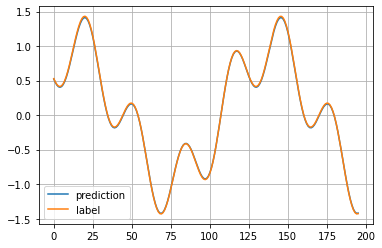

In [44]:
plt.plot(pred, label='prediction')
plt.plot(y_test, label='label')
plt.grid()
plt.legend(loc='best')
plt.show()

In [39]:
print(np.sum(abs(y_test-pred)/y_test)/len(x_test))

0.010859837545275154
